In [1]:
from __future__ import division, print_function

import netCDF4 as nc
import numpy as np

import numpy.ma as ma
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import glob
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
from mpl_toolkits import basemap
import warnings
from exceptions import KeyError
from netCDF4 import Dataset
%matplotlib inline

In [2]:
mesh = nc.Dataset('/mnt/storage0/jacquielee/research/data/Jasper/mesh_mask_anha4_201509.nc')
mask = mesh.variables['tmask'][0]
mbathy = ma.array(mesh.variables['mbathy'][0],mask=(mask[0,:,:]-1)*-1)

In [3]:
#state locations of output
control = '/mnt/storage0/xhu/NEMO/ANHA4-EXH005/ANHA4-EXH005_'
control_storage = '/mnt/storage0/jacquielee/research/data/ANHA4-EXH005/ANHA4-EXH005_'
stlandj = '/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_'
polzin  = '/mnt/storage0/jacquielee/research/data/ANHA4-VJT003/ANHA4-VJT003_'

In [55]:
#nc.Dataset(control+'y2002m01d05_gridT.nc').variables

In [51]:
def yearly_average(path, year):
    '''
    Calcluates the average temperature and salinity values over the whole ANHA4 
    domain for a given year
    '''
    filename = glob.glob(path+'y'+year+'m??d??_gridT.nc')
    avg_sal = np.zeros((50,800,544),dtype=float)
    avg_temp = np.zeros((50,800,544),dtype=float)
    
    for f in np.arange(0,len(filename)):
        tracer = nc.Dataset(filename[f])
        temp = tracer.variables['votemper'][0,:,:,:]
        sal = tracer.variables['vosaline'][0,:,:,:]
        avg_sal[:,:,:] = avg_sal[:,:,:]+sal[:,:,:]
        avg_temp[:,:,:] = avg_temp[:,:,:]+temp[:,:,:]
    avg = len(filename)*np.ones((50,800,544))
    avg_sal = ma.array(avg_sal/avg,mask=(mask-1)*-1)
    avg_temp = ma.array(avg_temp/avg,mask=(mask-1)*-1)
    tracer = nc.Dataset(filename[0])
    zlevels = tracer.variables['deptht']
    nav_lon=tracer.variables['nav_lon'][:]
    nav_lat=tracer.variables['nav_lat'][:]
    print('Done Averaging T+S '+year)
    return avg_sal,avg_temp, zlevels, nav_lat, nav_lon

def yearly_average2D(path, yrstart, yrend, grid, var,path2=None):
    
        for year in range(yrstart,yrend):
            
            filename = glob.glob(path+'y'+str(year)+'m??d??_'+grid+'.nc')
            avg = np.zeros((800,544),dtype=float)
            for f in np.arange(0,len(filename)):
                tracer = nc.Dataset(filename[f])
                variable = tracer.variables[var][0,:,:]
    
                avg[:,:] = avg[:,:]+variable[:,:]
                
            avger = len(filename)*np.ones((800,544))
            
            avg = np.divide(avg,avger)
            
            nrows = 800
            ncols = 544
            
            if path2 !=None:
                netfile = Dataset(path2+'avg_'+var+'_y'+str(year)+'.nc', 'w', format='NETCDF3_64BIT')
            else:
                netfile = Dataset(path+'avg_'+var+'_y'+str(year)+'.nc', 'w', format='NETCDF3_64BIT')
            netfile.createDimension('x', nrows)
            netfile.createDimension('y', ncols)

            t_var = netfile.createVariable(var, 'f8', ('x', 'y'))

            t_var[:,:] = avg[:,:]
            netfile.close()
            
            print(path+'avg_'+var+'_y'+str(year)+'.nc')
    
def monthly_average(path):
    
    for year in range(2002,2011):
        for month in range(1,13):
            
            filename = glob.glob(path+'y'+str(year)+'m{:02d}'.format(month)+'d??_gridT.nc')
            avg_sal = np.zeros((50,800,544),dtype=float)
            avg_temp = np.zeros((50,800,544),dtype=float)
            for f in np.arange(0,len(filename)):
                tracer = nc.Dataset(filename[f])
                temp = tracer.variables['votemper'][0,:,:,:]
                sal = tracer.variables['vosaline'][0,:,:,:]
                avg_sal[:,:,:] = avg_sal[:,:,:]+sal[:,:,:]
                avg_temp[:,:,:] = avg_temp[:,:,:]+temp[:,:,:]
                
            avg = len(filename)*np.ones((50,800,544))
            avg_sal = ma.array(avg_sal/avg,mask=(mask-1)*-1)
            avg_temp = ma.array(avg_temp/avg,mask=(mask-1)*-1)
            
            nrows = 800
            ncols = 544
            nvert = 50
    
            netfile = Dataset(control_storage+'avg_GridT_y'+str(year)+'_m{:02d}.nc'.format(month), 'w', format='NETCDF3_64BIT')
            print(path+'avg_GridT_y'+str(year)+'_m{:02d}.nc'.format(month))
            netfile.createDimension('x', nrows)
            netfile.createDimension('y', ncols)
            netfile.createDimension('z', nvert)
            t_var = netfile.createVariable('votemper', 'f8', ('z','x', 'y'))
            s_var = netfile.createVariable('vosaline', 'f8', ('z','x', 'y'))
            t_var[:,:,:] = avg_temp[:,:,:]
            s_var[:,:,:] = avg_sal[:,:,:]
            netfile.close()
            
def monthly_average2D(path, yrstart, yrend, grid, var,path2=None):
    
    for year in range(yrstart,yrend):
        for month in range(1,13):
            
            filename = glob.glob(path+'y'+str(year)+'m{:02d}'.format(month)+'d??_'+grid+'.nc')
            avg = np.zeros((800,544),dtype=float)
            for f in np.arange(0,len(filename)):
                tracer = nc.Dataset(filename[f])
                variable = tracer.variables[var][0,:,:]
    
                avg[:,:] = avg[:,:]+variable[:,:]
                
            avger = len(filename)*np.ones((800,544))
            
            avg = np.divide(avg,avger)
            
            nrows = 800
            ncols = 544
            
            if path2 !=None:
                netfile = Dataset(path2+'avg_'+var+'_y'+str(year)+'_m{:02d}.nc'.format(month), 'w', format='NETCDF3_64BIT')
            else:
                netfile = Dataset(path+'avg_'+var+'_y'+str(year)+'_m{:02d}.nc'.format(month), 'w', format='NETCDF3_64BIT')
            netfile.createDimension('x', nrows)
            netfile.createDimension('y', ncols)

            t_var = netfile.createVariable(var, 'f8', ('x', 'y'))

            t_var[:,:] = avg[:,:]
            netfile.close()
            
        print(path+'avg_'+var+'_y'+str(year)+'_m{:02d}.nc'.format(month))
    
    #tracer = nc.Dataset(path+'_y'+2004+'m'+12+'d'+21+'_gridT.nc')
def yearly_average_kappa(path, year):
    filename = glob.glob(path+'y'+year+'m??d??_gridW.nc')
    avg_kappa = np.zeros((50,800,544),dtype=float)
    for f in np.arange(0,len(filename)):
        tracer = nc.Dataset(filename[f])
        kappa = tracer.variables['votkeavt'][0,:,:,:]
        avg_kappa[:,:,:] = avg_kappa[:,:,:]+kappa[:,:,:]
    avg = len(filename)*np.ones((50,800,544))
    avg_kappa = ma.array(avg_kappa/avg,mask=(mask-1)*-1)
    print('Done Averaging Kappa '+year)
    return avg_kappa
    
    #tracer = nc.Dataset(path+'_y'+2004+'m'+12+'d'+21+'_gridT.nc')
    
def yearly_average_nsquare(path, year):
    filename = glob.glob(path+'y'+year+'m??d??_nsquare.nc')
    avg_var = np.zeros((50,800,544),dtype=float)
    for f in np.arange(0,len(filename)):
        tracer = nc.Dataset(filename[f])
        var = tracer.variables['nsquare'][:,:,:]
        avg_var[:,:,:] = avg_var[:,:,:]+var[:,:,:]
    avg = len(filename)*np.ones((50,800,544))
    avg_var = ma.array(avg_var/avg,mask=(mask-1)*-1)
    print('Done Averaging Nsq '+year)
    return avg_var

In [52]:
# monthly_average2D(stlandj,2002,2016,'gridT','sossheig')
# monthly_average2D(polzin,2002,2016,'gridT','sossheig')
# monthly_average2D(control,2002,2016,'gridT','sossheig',path2 = control_storage)
yearly_average2D(stlandj,2002,2016,'gridT','sossheig')
yearly_average2D(polzin,2002,2016,'gridT','sossheig')
yearly_average2D(control,2002,2016,'gridT','sossheig',path2 = control_storage)

/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_sossheig_y2002.nc
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_sossheig_y2003.nc
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_sossheig_y2004.nc
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_sossheig_y2005.nc
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_sossheig_y2006.nc
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_sossheig_y2007.nc
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_sossheig_y2008.nc
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_sossheig_y2009.nc
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_sossheig_y2010.nc
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_sossheig_y2011.nc
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_sossheig_y2012.nc
/mnt/storage0/jacquielee/research/data/ANHA

In [42]:


monthly_average2D(stlandj,2002,2016,'icemod','iicethic')
monthly_average2D(polzin,2002,2016,'icemod','iicethic')
monthly_average2D(control,2002,2016,'icemod','iicethic',path2 = control_storage)

/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_iicethic_y2002_m12.nc
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_iicethic_y2003_m12.nc
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_iicethic_y2004_m12.nc
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_iicethic_y2005_m12.nc
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_iicethic_y2006_m12.nc
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_iicethic_y2007_m12.nc
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_iicethic_y2008_m12.nc
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_iicethic_y2009_m12.nc
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_iicethic_y2010_m12.nc
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_iicethic_y2011_m12.nc
/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_avg_iicethic_y2012_m12.nc

In [72]:
# want the averageof icethickness for 2012 to 2016 for March and September
def average_months2D(path, yrstart, yrend, grid, var,month,path2=None):
    avg = np.zeros((800,544),dtype=float)
    total = 0.0
    for year in range(yrstart,yrend):
            
        filename = glob.glob(path+'y'+str(year)+'m09d??_'+grid+'.nc')
        
        for f in np.arange(0,len(filename)):
            tracer = nc.Dataset(filename[f])
            variable = tracer.variables[var][0,:,:]
    
            avg[:,:] = avg[:,:]+variable[:,:]
        
        total = total+len(filename)
        print(total)        
    avger = total*np.ones((800,544))
            
    avg = np.divide(avg,avger)
            
    nrows = 800
    ncols = 544
            
    if path2 !=None:
        netfile = Dataset(path2+'m'+month+'2012-2016avg_'+var+'.nc', 'w', format='NETCDF3_64BIT')
    else:
        netfile = Dataset(path+'m'+month+'2012-2016avg_'+var+'.nc', 'w', format='NETCDF3_64BIT')
    netfile.createDimension('x', nrows)
    netfile.createDimension('y', ncols)

    t_var = netfile.createVariable(var, 'f8', ('x', 'y'))

    t_var[:,:] = avg[:,:]
    netfile.close()
            
    print('m'+month+'2012-2016avg_'+var+'.nc')


In [73]:
average_months2D(control,2012,2016,'icemod','iicethic','09',path2 = control_storage)
average_months2D(stlandj,2012,2016,'icemod','iicethic','09')
average_months2D(polzin,2012,2016,'icemod','iicethic','09')

6.0
12.0
18.0
24.0
m092012-2016avg_iicethic.nc
6.0
12.0
18.0
24.0
m092012-2016avg_iicethic.nc
6.0
12.0
18.0
24.0
m092012-2016avg_iicethic.nc


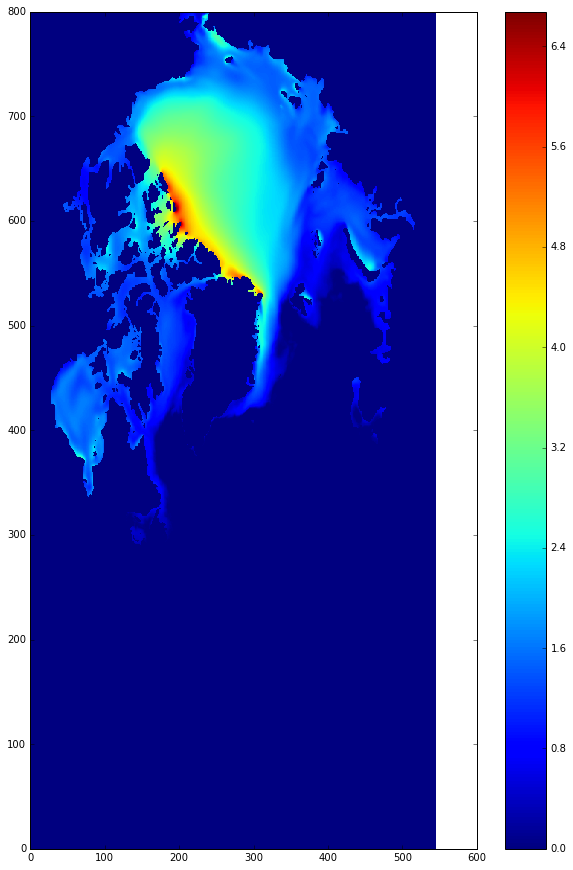

In [44]:
fig, ax = plt.subplots(1,1, figsize=(10,15)) 
x = np.arange(0,800)
y = np.arange(0,544)
X, Y = np.meshgrid(x[:], y[:])
cmap = plt.get_cmap('jet')
cmap.set_bad('0.25',alpha=None)
#norm = colors.PowerNorm(2,vmin=27, vmax=37)
mesh = ax.pcolormesh(icethik[:,:],cmap=cmap)


bar = plt.colorbar(mesh)